# Image Fraud Detection Algorithm Analysis

In [17]:
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf
from tensorflow.keras.preprocessing import image

DIR = os.getcwd()
IMG_WIDTH = 28
IMG_HEIGHT = 28
IMG_PIXELS = IMG_HEIGHT*IMG_WIDTH
COLOR_MODE = 'grayscale'
PATH_DATASET_TRAIN = "Datasets/dataset_train/"

In [18]:
plt.rcParams['figure.figsize'] = (15,12)

## Data Loading

Loading a total of 40000 images with 28x28 pixels and grayscale as the color mode. The division is as the following:

- 20000 real images
- 20000 fake images


In [19]:
def loadDataset():
    train_ds = image_dataset_from_directory(
        PATH_DATASET_TRAIN,
        labels = 'inferred',
        label_mode='binary',
        color_mode=COLOR_MODE,
        image_size=(IMG_HEIGHT,IMG_WIDTH)
    )

    return train_ds.unbatch()

train_ds = loadDataset()

Found 40000 files belonging to 2 classes.


In [23]:
def formatDataset(dataset):
    X = []
    Y = []
    for img,label in dataset.as_numpy_iterator():
        imgData = np.array([row.flatten() for row in img])
        X.append(imgData.flatten())
        Y.append(label[0])
    X = np.array(X)
    Y = np.array(Y)
    return X/255,Y

We use the tensorflow library to get the data and then use the function formatDataset to return numpy arrays to use for the models training:

- Returns a numpy array with shape (40000,28,28) 
    - 40000 rows equals the 40000 images
    - Inside each row is the information of the image after being loaded
- Also returns another numpy array with shape (40000,1), which the label corresponding to each image
    - Label 0 --> **FAKE**
    - Label 1 --> **REAL**

# Feature Extraction

## Edge Features

# Data Splitting

## Train - Validation - Test

In this case the validation Ratio is according to the rest of the first split

Example: 
    - valRatio = 0.5; testRatio = 0.4
    - Then 0.5*0.4 = 0.2 so in reality the validation ratio is 20%

In [21]:
def TVT(X,Y,testRatio,valRatio):
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=testRatio, random_state=13)
    X_test, X_val, Y_test, Y_val = train_test_split(X_val, Y_val, test_size=valRatio, random_state=13)
    return X_train,X_val,X_test,Y_train,Y_val,Y_test

## K-Fold Splitting

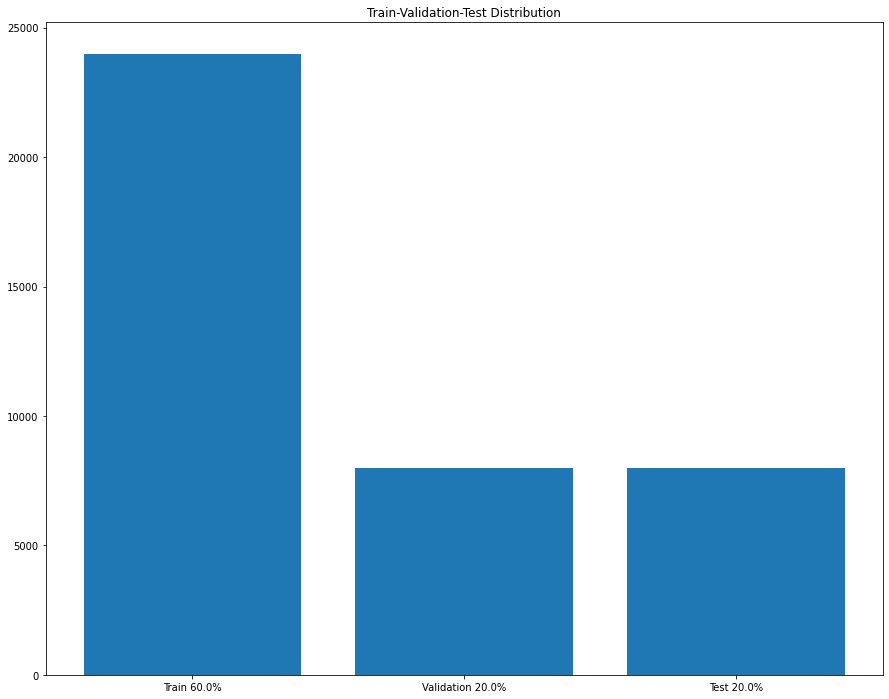

In [25]:
X,Y = formatDataset(train_ds)
totImages = Y.shape[0]

X_train,X_val,X_test,Y_train,Y_val,Y_test = TVT(X,Y,0.4,0.5)
freqs = [Y_train.shape[0],Y_val.shape[0],Y_test.shape[0]]

plt.bar([f'Train {(freqs[0]/totImages)*100}%',f'Validation {freqs[1]/totImages*100}%',f'Test {freqs[2]/totImages*100}%'],freqs)
plt.title('Train-Validation-Test Distribution')
plt.show()

# **Models Prediction Analysis**

### Support Vector Macinhe (SVM)

- SVM's are algorithms commonly used for supervised machine learning models. 
- High degree of accuracy compared to other classification algorithms such as **K-Nearest Neighbour**
- Separate data into different classes of data by using a hyperplane, supported by the use of **support vectors**
- **Kernel** function transforms the data into a higher dimension
    - Types of function: linear, polynomial,rbf (Radial Basis Function) ,sigmoid
    - Example: <u>Negative sum of the squares</u> of the coordinates for each of these values and have that equal the third dimension of the data


### Artificial Neural Networks (MLP)


In [26]:
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV,cross_val_score
SEED = 13

In [27]:
models = {}
params_SVM = {'kernel':('linear','rbf','poly','sigmoid'),'C':[1,10],'random_state':[SEED]}
params_MLP = {'learning_rate':['invscaling','adaptive'],'random_state':[SEED]}

# models.update({'SVM':[SVC(random_state=SEED),
#                         SVC(random_state=SEED,kernel = 'poly'),
#                         SVC(random_state=SEED, kernel = 'linear'),
#                         SVC(random_state=SEED, kernel = 'sigmoid')]})

models.update({'SVM':GridSearchCV(SVC(),params_SVM)})


# models.update({'MLP': [MLPClassifier(random_state=SEED),
#                 MLPClassifier(learning_rate= 'invscaling',random_state=SEED),
#                 MLPClassifier(learning_rate= 'adaptive',random_state=SEED)]})

models.update({'MLP':GridSearchCV(MLPClassifier(),params_SVM)})
#tensorFlow


In [28]:
print(X_train.shape)
print(Y_train.shape)
for name,model in models.items():
    model.fit(X_train,Y_train)
    print(model.cv_results)

(24000, 784)
(24000,)
